In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # 6371 radius of earth in kilometers. Use 3956 for miles
    return c * r

In [7]:
df = pd.read_csv("tracts.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73641 entries, 0 to 73640
Data columns (total 7 columns):
lat        73641 non-null float64
lon        73641 non-null float64
area       73641 non-null float64
tract      73641 non-null int64
pop        73641 non-null int64
tract2     73641 non-null int64
density    73641 non-null float64
dtypes: float64(4), int64(3)
memory usage: 4.5 MB


In [24]:
import ggplot as gg
def plot(lat, lon, df, city, dist):
    df['dist'] = df.apply(lambda x: haversine(lat, lon, x['lat'], x['lon']), axis=1)
    df = df[df['dist'] < dist].reset_index(drop=True)
    p = gg.ggplot(gg.aes(x='dist',y='density'), data = df)
    print (p+gg.stat_smooth(color='red')+gg.geom_point(alpha=0.5)+gg.ggtitle(city) + gg.xlab("Distance (miles from city center)") + gg.ylab("Density (people per square mile)"))

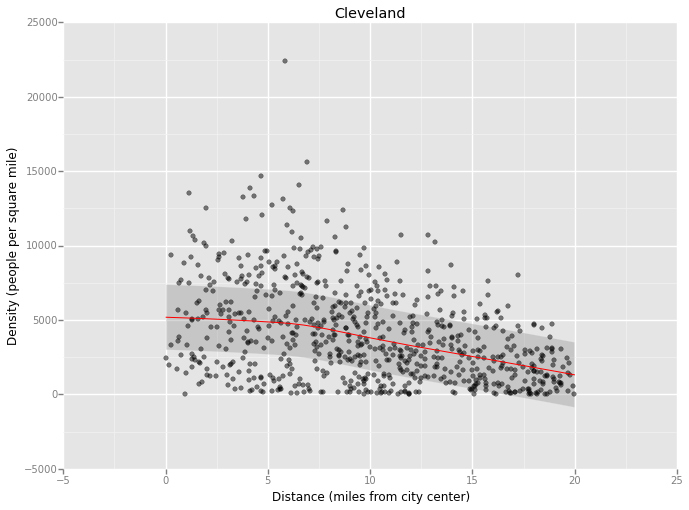

<ggplot: (277615993)>


In [16]:
plot(41.4997498,-81.6885114, df, 'Cleveland', 20)

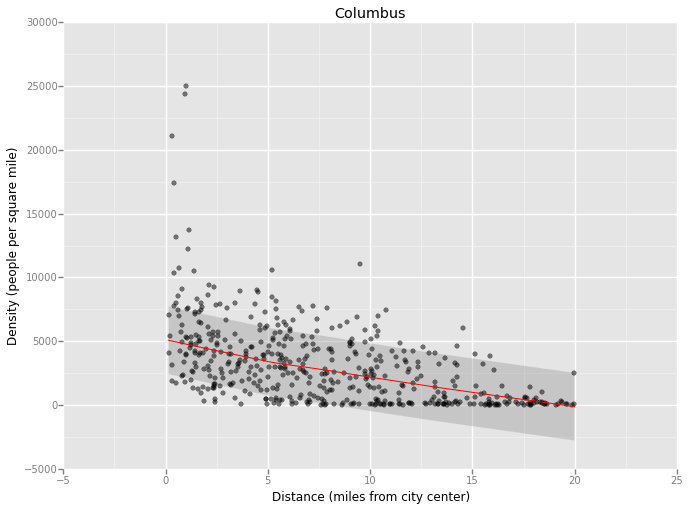

<ggplot: (281113569)>


In [26]:
plot(39.9636956,-82.9986181, df, 'Columbus', 20)

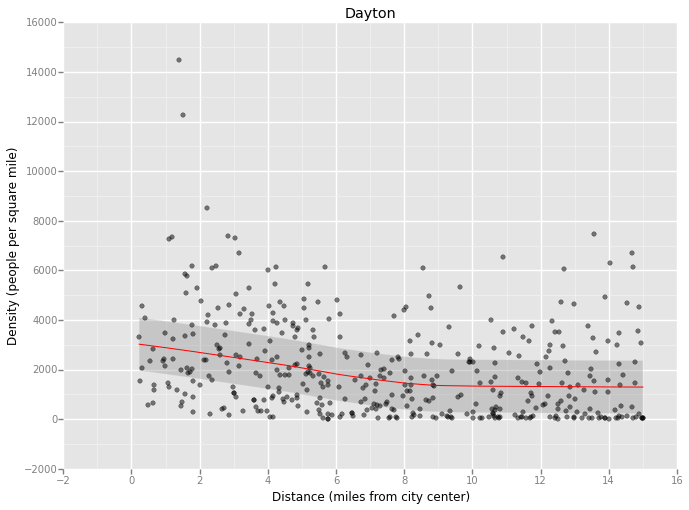

<ggplot: (277548133)>


In [28]:
plot(39.758511, -84.192373, df, 'Dayton',15)

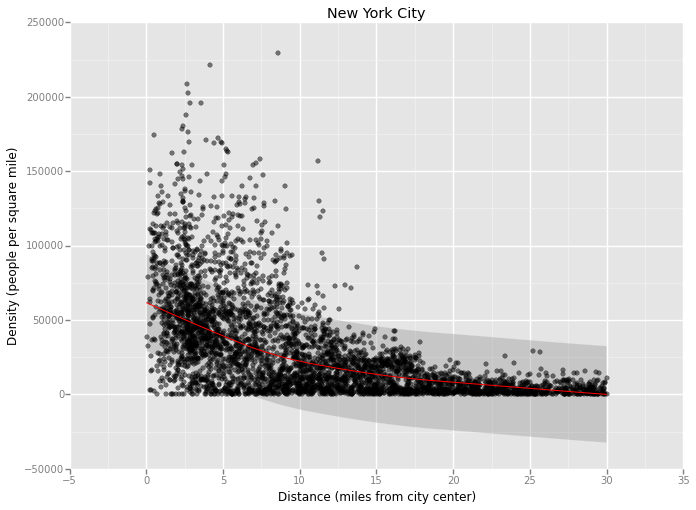

<ggplot: (271191793)>


In [30]:
plot(40.7414317,-73.9868908, df, 'New York City',30) 

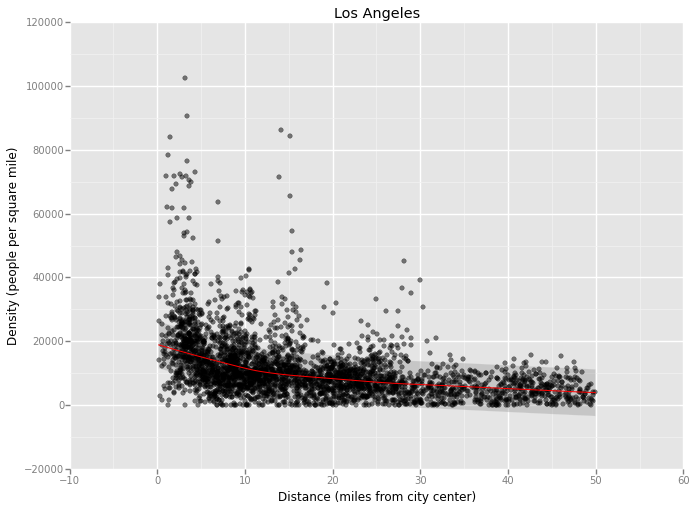

<ggplot: (281084273)>


In [34]:
plot(34.0500,-118.2500, df, 'Los Angeles',50) 

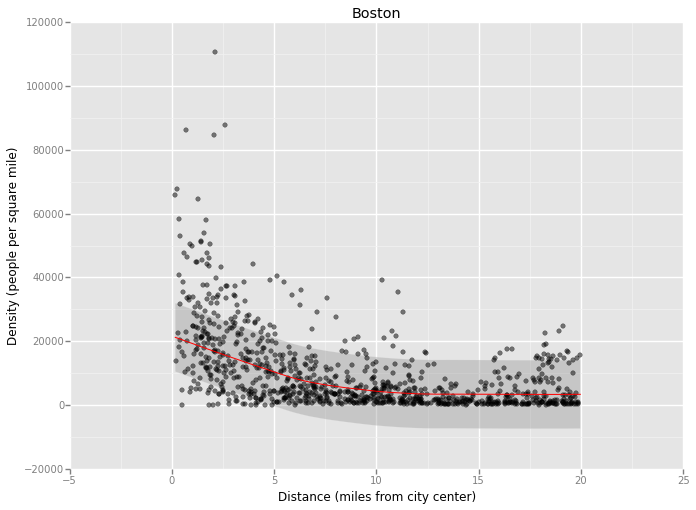

<ggplot: (281113401)>


In [37]:
plot(42.3601,-71.0589, df, 'Boston',20) 